Baseline-NN Model
-----------------------------

In [1]:
# Getting the dataset from the .npz file
import numpy as np

np.random.seed(42)

# Loading the date
data = np.load("preprocessed_data.npz")
x_train_flat, y_train = data["x_train_flat"], data["y_train"]
x_val_flat, y_val = data["x_val_flat"], data["y_val"]
x_test_flat, y_test = data["x_test_flat"], data["y_test"]

Dropout is a regularization technique, in which Dropout randomly set a fraction of the neuron's output to 0 in a layer in each forward pass.

In [3]:
# Training NN model with compared dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import time

# Dropout rate = 50%
def build_model_with_dropout_05():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Dropout rate 20%
def build_model_with_dropout_02():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


L2 Regularization is Ridge Regression, and it scales the weights towards 0

In [5]:
# With L2 Regularization

# L2 regularization with 0.001
def build_model_with_l2_1():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# L2 Regularization with 0.1
def build_model_with_l2_2():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [6]:
# Training the models and comparing them
dropout_model1 = build_model_with_dropout_05()
dropout_model2 = build_model_with_dropout_02()
l2_model1 = build_model_with_l2_1()
l2_model2 = build_model_with_l2_2()

# Train both models
start_time = time.time()
dropout_history1 = dropout_model1.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
end_time = time.time()

train_time = end_time - start_time
print(f"Dropout (50%)NN-Model Train Time: {train_time}")

start_time = time.time()
dropout_history2 = dropout_model2.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
end_time = time.time()

train_time = end_time - start_time
print(f"Dropout (20%)NN-Model Train Time: {train_time}")

# L2 Regularization Model
start_time = time.time()
l2_history1 = l2_model1.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
end_time = time.time()

train_time = end_time - start_time
print(f"L2 (0.001) NN-Model Train Time: {train_time}")

start_time = time.time()
l2_history2 = l2_model2.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
end_time = time.time()

train_time = end_time - start_time
print(f"L2 (0.1) NN-Model Train Time: {train_time}")

Epoch 1/10
766/766 - 4s - 5ms/step - accuracy: 0.6725 - loss: 0.9007 - val_accuracy: 0.8126 - val_loss: 0.5118
Epoch 2/10
766/766 - 2s - 3ms/step - accuracy: 0.7881 - loss: 0.6068 - val_accuracy: 0.8359 - val_loss: 0.4546
Epoch 3/10
766/766 - 3s - 3ms/step - accuracy: 0.8059 - loss: 0.5503 - val_accuracy: 0.8539 - val_loss: 0.4276
Epoch 4/10
766/766 - 2s - 3ms/step - accuracy: 0.8216 - loss: 0.5126 - val_accuracy: 0.8562 - val_loss: 0.4115
Epoch 5/10
766/766 - 3s - 4ms/step - accuracy: 0.8276 - loss: 0.4938 - val_accuracy: 0.8573 - val_loss: 0.4028
Epoch 6/10
766/766 - 3s - 3ms/step - accuracy: 0.8315 - loss: 0.4790 - val_accuracy: 0.8635 - val_loss: 0.3913
Epoch 7/10
766/766 - 3s - 4ms/step - accuracy: 0.8367 - loss: 0.4642 - val_accuracy: 0.8615 - val_loss: 0.3893
Epoch 8/10
766/766 - 3s - 5ms/step - accuracy: 0.8381 - loss: 0.4584 - val_accuracy: 0.8646 - val_loss: 0.3805
Epoch 9/10
766/766 - 3s - 4ms/step - accuracy: 0.8429 - loss: 0.4497 - val_accuracy: 0.8660 - val_loss: 0.3766
E


Dropout Model (50%):
Train Accuracy: 0.8446
Val Accuracy:   0.8645
Test Accuracy:  0.8709
Overfitting Gap: -0.0199

Dropout Model (20%):
Train Accuracy: 0.8839
Val Accuracy:   0.8811
Test Accuracy:  0.8807
Overfitting Gap: 0.0029

L2 Regularized Model (0.001):
Train Accuracy: 0.8766
Val Accuracy:   0.8697
Test Accuracy:  0.8718
Overfitting Gap: 0.0068

L2 Regularized Model (0.1):
Train Accuracy: 0.7823
Val Accuracy:   0.7883
Test Accuracy:  0.7879
Overfitting Gap: -0.0060


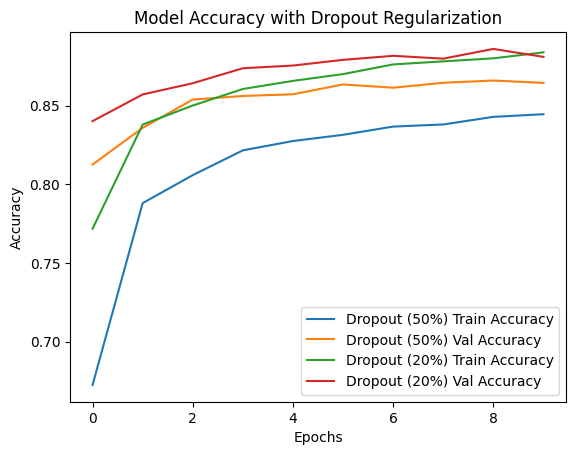

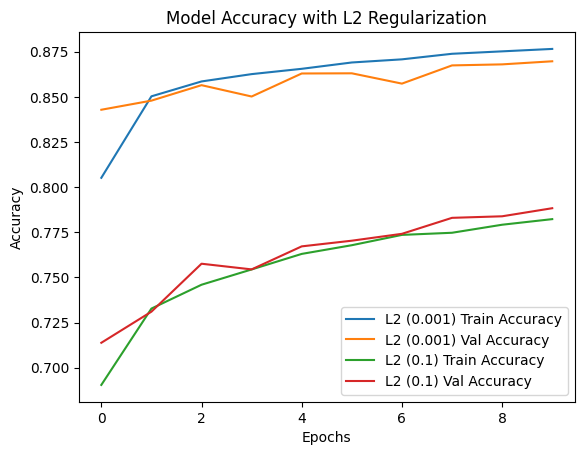

In [8]:
# Evaluate both models
# Dropout = 50%
dropout_train_acc = dropout_history1.history['accuracy'][-1]
dropout_val_acc = dropout_history1.history['val_accuracy'][-1]
dropout_test_acc = dropout_model1.evaluate(x_test_flat, y_test, verbose=0)[1]  # test accuracy
dropout_gap = dropout_train_acc - dropout_val_acc

print("\nDropout Model (50%):")
print(f"Train Accuracy: {dropout_train_acc:.4f}")
print(f"Val Accuracy:   {dropout_val_acc:.4f}")
print(f"Test Accuracy:  {dropout_test_acc:.4f}")
print(f"Overfitting Gap: {dropout_gap:.4f}")

# Dropout = 20%
dropout_train_acc = dropout_history2.history['accuracy'][-1]
dropout_val_acc = dropout_history2.history['val_accuracy'][-1]
dropout_test_acc = dropout_model2.evaluate(x_test_flat, y_test, verbose=0)[1]  # test accuracy
dropout_gap = dropout_train_acc - dropout_val_acc

print("\nDropout Model (20%):")
print(f"Train Accuracy: {dropout_train_acc:.4f}")
print(f"Val Accuracy:   {dropout_val_acc:.4f}")
print(f"Test Accuracy:  {dropout_test_acc:.4f}")
print(f"Overfitting Gap: {dropout_gap:.4f}")

# L2 Regularization (0.001)
l2_train_acc = l2_history1.history['accuracy'][-1]
l2_val_acc = l2_history1.history['val_accuracy'][-1]
l2_test_acc = l2_model1.evaluate(x_test_flat, y_test, verbose=0)[1]  # test accuracy
l2_gap = l2_train_acc - l2_val_acc

print("\nL2 Regularized Model (0.001):")
print(f"Train Accuracy: {l2_train_acc:.4f}")
print(f"Val Accuracy:   {l2_val_acc:.4f}")
print(f"Test Accuracy:  {l2_test_acc:.4f}")
print(f"Overfitting Gap: {l2_gap:.4f}")

# L2 Regularization (0.1)
l2_train_acc = l2_history2.history['accuracy'][-1]
l2_val_acc = l2_history2.history['val_accuracy'][-1]
l2_test_acc = l2_model2.evaluate(x_test_flat, y_test, verbose=0)[1]  # test accuracy
l2_gap = l2_train_acc - l2_val_acc

print("\nL2 Regularized Model (0.1):")
print(f"Train Accuracy: {l2_train_acc:.4f}")
print(f"Val Accuracy:   {l2_val_acc:.4f}")
print(f"Test Accuracy:  {l2_test_acc:.4f}")
print(f"Overfitting Gap: {l2_gap:.4f}")

# Plotting training and validation accuracy vs epochs for both models
plt.plot(dropout_history1.history['accuracy'], label='Dropout (50%) Train Accuracy')
plt.plot(dropout_history1.history['val_accuracy'], label='Dropout (50%) Val Accuracy')
plt.plot(dropout_history2.history['accuracy'], label='Dropout (20%) Train Accuracy')
plt.plot(dropout_history2.history['val_accuracy'], label='Dropout (20%) Val Accuracy')
plt.title('Model Accuracy with Dropout Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


plt.plot(l2_history1.history['accuracy'], label='L2 (0.001) Train Accuracy')
plt.plot(l2_history1.history['val_accuracy'], label='L2 (0.001) Val Accuracy')
plt.plot(l2_history2.history['accuracy'], label='L2 (0.1) Train Accuracy')
plt.plot(l2_history2.history['val_accuracy'], label='L2 (0.1) Val Accuracy')
plt.title('Model Accuracy with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


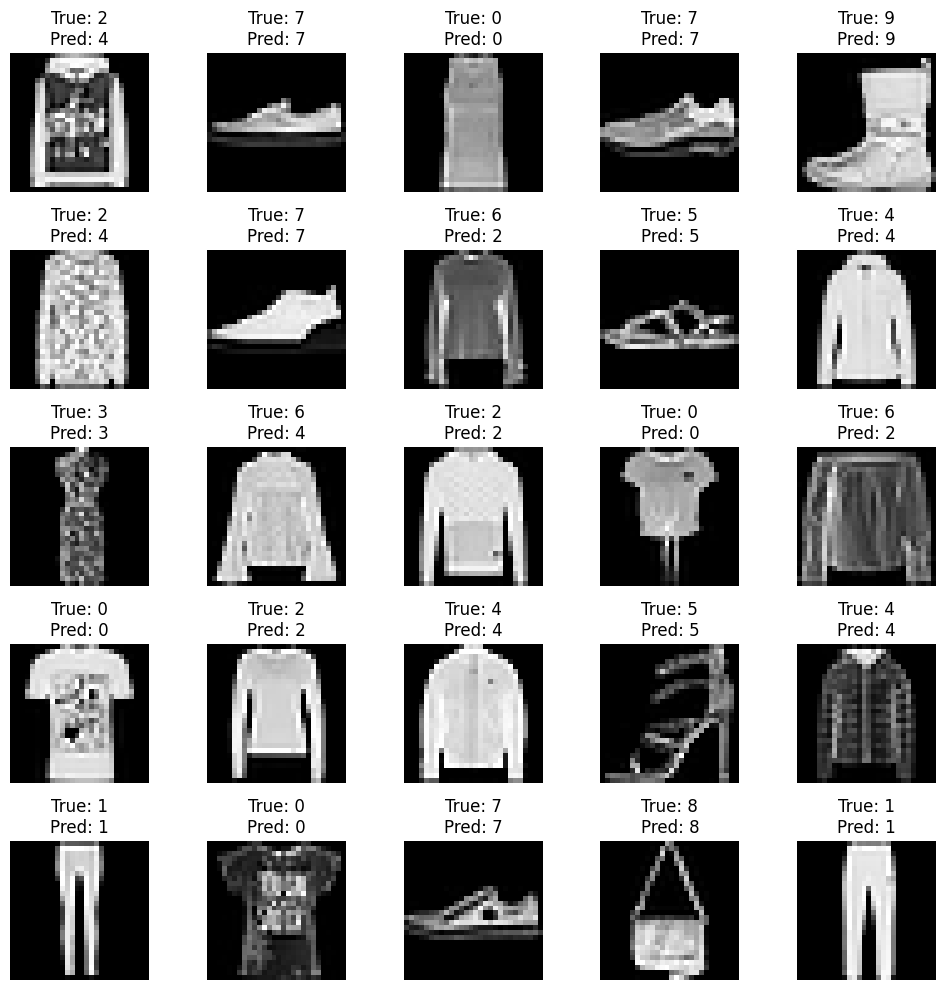

In [7]:
# Use L2 model for testing
predictions = l2_model.predict(x_test_flat[:25])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
